In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import plotting

#plotly 
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,classification_report,precision_score, plot_roc_curve, plot_precision_recall_curve, balanced_accuracy_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set(style="whitegrid")

plt.style.use('fivethirtyeight')

import warnings


In [2]:
df=pd.read_csv('../input/gender-classification/Transformed Data Set - Sheet1.csv')

In [3]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [4]:
df['Favorite Color'].value_counts()

Cool       37
Warm       22
Neutral     7
Name: Favorite Color, dtype: int64

In [5]:
df['Favorite Music Genre'].value_counts()

Rock                19
Pop                 17
Hip hop              8
Electronic           8
R&B and soul         6
Folk/Traditional     4
Jazz/Blues           4
Name: Favorite Music Genre, dtype: int64

In [6]:
df['Favorite Beverage'].value_counts()

Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: Favorite Beverage, dtype: int64

In [7]:
df['Favorite Soft Drink'].value_counts()

Coca Cola/Pepsi    32
Fanta              14
7UP/Sprite         13
Other               7
Name: Favorite Soft Drink, dtype: int64

In [8]:
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

Class 0: 33
Class 1: 33
Proportion: 1.0 : 1


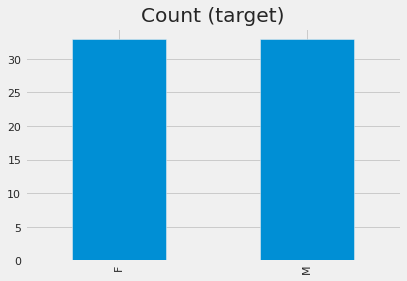

In [9]:
target_count = df['Gender'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,0
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,0
2,Warm,Rock,Wine,Coca Cola/Pepsi,0
3,Warm,Folk/Traditional,Whiskey,Fanta,0
4,Cool,Rock,Vodka,Coca Cola/Pepsi,0


In [11]:
df.columns

Index(['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage',
       'Favorite Soft Drink', 'Gender'],
      dtype='object')

In [12]:
year_feature=pd.get_dummies(df, columns=['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage','Favorite Soft Drink'])
year_feature.head()

,Gender,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Electronic,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,...,Favorite Beverage_Beer,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_7UP/Sprite,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [13]:
year_feature.columns

Index(['Gender', 'Favorite Color_Cool', 'Favorite Color_Neutral',
       'Favorite Color_Warm', 'Favorite Music Genre_Electronic',
       'Favorite Music Genre_Folk/Traditional', 'Favorite Music Genre_Hip hop',
       'Favorite Music Genre_Jazz/Blues', 'Favorite Music Genre_Pop',
       'Favorite Music Genre_R&B and soul', 'Favorite Music Genre_Rock',
       'Favorite Beverage_Beer', 'Favorite Beverage_Doesn't drink',
       'Favorite Beverage_Other', 'Favorite Beverage_Vodka',
       'Favorite Beverage_Whiskey', 'Favorite Beverage_Wine',
       'Favorite Soft Drink_7UP/Sprite', 'Favorite Soft Drink_Coca Cola/Pepsi',
       'Favorite Soft Drink_Fanta', 'Favorite Soft Drink_Other'],
      dtype='object')

In [14]:
X=year_feature.drop('Gender', axis=1)
y=year_feature['Gender']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)


In [17]:
lr=LogisticRegression()
lr.fit(X, y)

LogisticRegression()

In [18]:
import statsmodels.api as sm
lr_model=sm.Logit(y, X)
result=lr_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.534557
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Gender   No. Observations:                   66
Model:                          Logit   Df Residuals:                       49
Method:                           MLE   Df Model:                           16
Date:                Mon, 18 Oct 2021   Pseudo R-squ.:                  0.2288
Time:                        11:50:48   Log-Likelihood:                -35.281
converged:                       True   LL-Null:                       -45.748
Covariance Type:            nonrobust   LLR p-value:                    0.1811
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Favorite Color_Cool                       0.4356   3.0

In [19]:
print(lr.intercept_)

[0.31802536]


In [20]:
y_pred=lr.predict(X_train)


In [21]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.6739130434782609
F1 Score:- 0.6938775510204083
Average Precision Score:- 0.633840579710145
Log Loss:- 11.262783537023955
Precision Score:- 0.68
Recall Score:- 0.7083333333333334
ROC-AUC Score:- 0.6723484848484849


In [22]:
y_test_pred=lr.predict(X_test)


In [23]:
lr_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",lr_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.8
F1 Score:- 0.75
Average Precision Score:- 0.7214285714285714
Log Loss:- 6.907795258853648
Precision Score:- 0.8571428571428571
Recall Score:- 0.6666666666666666
ROC-AUC Score:- 0.7878787878787877


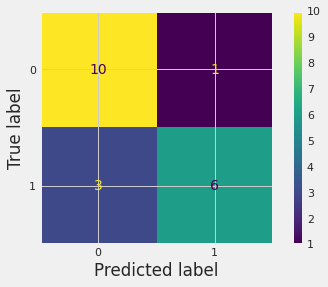

In [24]:
cfm=confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cfm,
                               display_labels=lr.classes_)
disp.plot()

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,precision_score, plot_roc_curve, plot_precision_recall_curve, balanced_accuracy_score

def clf_scores(clf, y_predicted):
    # Accuracy
    acc_train = clf.score(X_train, y_train)*100
    acc_test = clf.score(X_test, y_test)*100
    
    roc = roc_auc_score(y_test, y_predicted)*100 
    tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
    cm = confusion_matrix(y_test, y_predicted)
    correct = tp + tn
    incorrect = fp + fn
    d=[acc_train, acc_test,  roc, correct, incorrect,  cm]
    index=["acc_train",'Test Accuracy',"Roc Score","COrrect","Incorrect","Confusion"  ]
    output=pd.DataFrame(data=d, index=index)
    
    d=sns.heatmap(cm, annot=True)
    dd=plot_roc_curve(clf, X_train, y_train)
    ddd=plot_precision_recall_curve(clf, X_train, y_train)

    return output,d, dd, ddd

(                              0
acc_train             69.565217
Test Accuracy              60.0
Roc Score             61.616162
COrrect                      12
Incorrect                     8
Confusion      [[5, 6], [2, 7]], <AxesSubplot:>, <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7fed1058af90>, <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay object at 0x7fed103d7d50>)


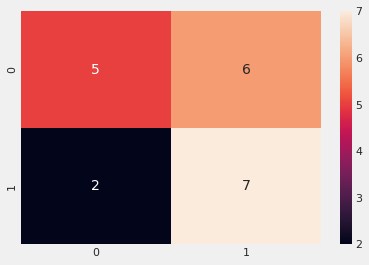

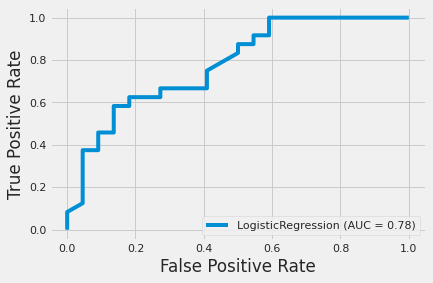

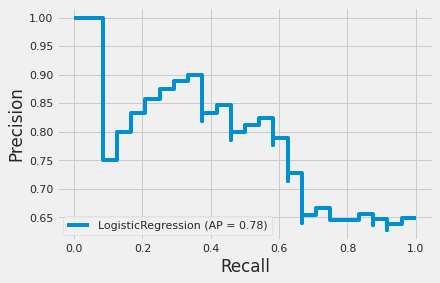

In [26]:
#1. Logistic regression

from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

Y_pred_lr = clf_lr.predict(X_test)
print(clf_scores(clf_lr, Y_pred_lr))

In [27]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [28]:
threshold = []
accuracy = []

for p in np.unique(model.predict_proba(X_train)[:,1]):
    threshold.append(p)
    y_pred = (model.predict_proba(X_train)[:,1] >= p).astype(int)
    accuracy.append(balanced_accuracy_score(y_train,y_pred))

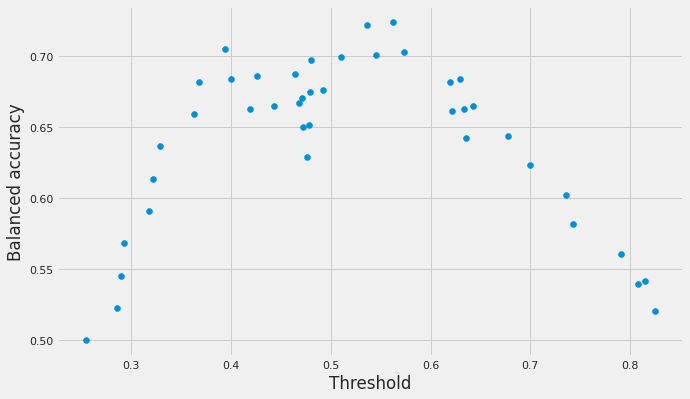

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()

# Build Logistic Regression with Hyperparameter¶


In [30]:
lr = LogisticRegression()


In [31]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [32]:
from sklearn.model_selection import GridSearchCV


In [33]:
clf = GridSearchCV(lr, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)


In [34]:
best_clf = clf.fit(X_train,y_train)


Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFai

In [35]:
best_clf.best_estimator_

LogisticRegression(C=4.281332398719396, penalty='l1', solver='saga')

* C=4.281332398719396, 
* penalty='l1', 
* solver='saga'

In [36]:
model=LogisticRegression(C=4.281332398719396, penalty='l1', solver='saga')


In [37]:
model.fit(X_train, y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(C=4.281332398719396, penalty='l1', solver='saga')

In [38]:
y_pred =model.predict_proba(X_train)[:,1] >= 0.5


In [39]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.7391304347826086
F1 Score:- 0.7272727272727272
Average Precision Score:- 0.7072463768115942
Log Loss:- 9.010185111492369
Precision Score:- 0.8
Recall Score:- 0.6666666666666666
ROC-AUC Score:- 0.7424242424242422


In [40]:
y_test_pred=model.predict(X_test)>= 0.5


In [41]:
lr_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",lr_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.6
F1 Score:- 0.5
Average Precision Score:- 0.503968253968254
Log Loss:- 13.815630497578804
Precision Score:- 0.5714285714285714
Recall Score:- 0.4444444444444444
ROC-AUC Score:- 0.5858585858585859


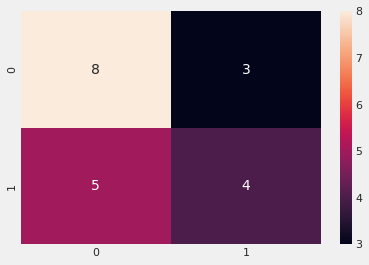

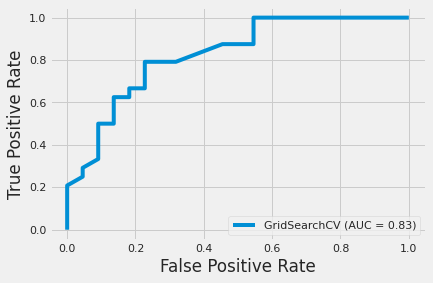

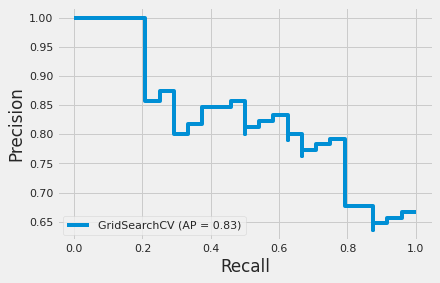

In [42]:
acc_train = model.score(X_train, y_train)*100
acc_test = model.score(X_test, y_test)*100
    
roc = roc_auc_score(y_test, y_test_pred)*100 
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
cm = confusion_matrix(y_test, y_test_pred)
correct = tp + tn
incorrect = fp + fn
d=[acc_train, acc_test,  roc, correct, incorrect,  cm]
index=["acc_train",'Test Accuracy',"Roc Score","COrrect","Incorrect","Confusion"  ]
output=pd.DataFrame(data=d, index=index)
    
sns.heatmap(cm, annot=True)
plot_roc_curve(clf, X_train, y_train)
plot_precision_recall_curve(clf, X_train, y_train)